# Data Cleaning Practices

In this lab, we will apply learned concepts from Day 1-2 lectures to perform data cleaning on a given Airbnb data set. 

This dataset (raw.csv) contains 30k+ records on hotels in the top-10 tourist destinations and major US metropolitan areas sraped from Airbnb.com. 
Each data record has 40 attributes including the number of bedrooms, price, location, etc. 
The attribute "pop2016" means population of the zipcode location (area) in year 2016.
Demographic and economic attributes were scraped from city-data.com. 

The prediction label is Rating of hotel (Y/N - whether the rating of each hotel is 5 or not). 



## Submission: submit via onq. 


In [40]:
# Step 1: Import needed libraries. E.g., pandas, missingno, and sklearn
import pandas as pd
import missingno as msno
import sklearn

Task 1: Read dataset and perform basic data exploration. Specially, you should write code to explore the types of data provided

In [41]:
# TODO for Task 1, put your code here to perform data type and data scale check
df = pd.read_csv('raw.csv')
# show first five rows
df.head()

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
0,1.0,1.0,1.0,Atlanta,2.0,7.0,38.0,Y,33.75515,-84.32992,...,5306.0,75,1.413494,104.743243,35.280702,4.944444,1.459459,1.845070,2.146667,2.146667
1,1.0,1.0,1.0,Atlanta,2.0,15.0,38.0,N,33.82613,-84.33963,...,10537.2,96,0.911058,103.673684,21.169231,4.847458,1.281250,1.473118,1.687500,1.687500
2,2.0,2.0,2.0,Atlanta,4.0,17.0,100.0,Y,33.75076,-84.37058,...,9114.4,200,2.194330,119.368687,40.400000,4.937500,1.375000,1.602094,1.925000,1.925000
3,1.0,1.0,1.0,Atlanta,2.0,304.0,78.0,Y,33.77059,-84.33538,...,7808.0,130,1.664959,119.914729,44.063158,4.892857,1.292308,1.603306,1.953846,1.953846
4,1.0,1.0,1.0,Atlanta,2.0,19.0,50.0,Y,33.79030,-84.40027,...,9343.6,190,2.033477,131.058511,28.444444,4.881679,1.326316,1.580838,1.968421,1.968421


In [42]:
# short description about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33145 entries, 0 to 33144
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Bathrooms                                           32697 non-null  float64
 1   Bedrooms                                            29818 non-null  float64
 2   Beds                                                32831 non-null  float64
 3   LocationName                                        32826 non-null  object 
 4   NumGuests                                           32831 non-null  float64
 5   NumReviews                                          32829 non-null  float64
 6   Price                                               32507 non-null  float64
 7   Rating                                              33145 non-null  object 
 8   latitude                                            33145 non-null  float64


In [88]:
# summary statistics
df.describe()

,Bathrooms,Bedrooms,Beds,NumGuests,NumReviews,Price,latitude,longitude,zipcode,pop2016,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
count,28474.000000,25949.000000,28577.000000,28577.000000,28576.000000,28264.000000,28891.000000,28891.000000,28891.000000,28849.000000,...,28849.000000,28891.000000,28849.000000,28891.000000,28891.000000,28891.000000,28891.000000,28891.000000,28891.000000,28891.000000
mean,1.217672,1.474855,1.948315,3.555972,50.005424,116.807246,36.892792,-96.215671,54978.950192,35344.339423,...,14137.735769,651.591672,29.754229,124.049311,48.331697,4.816257,1.234803,1.492983,1.949216,1.949216
std,0.543376,0.842244,1.436027,2.292408,61.225511,96.108974,5.349020,21.336783,37389.498094,22536.497904,...,9014.599162,1072.527749,87.029115,37.383838,16.256303,0.070982,0.134332,0.224931,0.357143,0.357143
min,0.000000,1.000000,0.000000,1.000000,2.000000,10.000000,25.452690,-122.544590,2108.000000,69.000000,...,27.600000,1.000000,0.003440,16.000000,4.000000,4.250000,0.344828,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,11.000000,60.000000,32.754070,-122.220415,19103.000000,17850.000000,...,7140.000000,102.000000,0.677095,99.723404,37.412946,4.779188,1.157895,1.374302,1.729032,1.729032
50%,1.000000,1.000000,1.000000,3.000000,28.000000,90.000000,37.811730,-90.064280,70115.000000,34248.000000,...,13699.200000,233.000000,2.092325,117.697403,46.406699,4.830189,1.223011,1.461605,1.902098,1.902098
75%,1.000000,2.000000,2.000000,4.000000,65.000000,139.000000,40.685535,-75.142370,94108.000000,46444.000000,...,18577.600000,562.000000,4.962823,144.178654,56.503125,4.868159,1.317597,1.594828,2.145043,2.145043
max,9.000000,10.000000,20.000000,16.000000,1099.000000,999.000000,47.742760,-70.983350,98177.000000,114602.000000,...,45840.800000,4143.000000,330.488194,347.000000,206.000000,5.000000,3.043478,3.333333,6.000000,6.000000


Task 2: Data quality check, does duplicate entries exit in this table? Do they have consistent values? Briefely explain your methodology and your findings within this markdown cell, and write corresponding code in the next code cell.


there are some rows which have some duplicate values but if you dig deeper into the row you will see different values across the columns


methodology: slice the dataframe to get the rows where the function duplicated think they have duplicates 

In [43]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
33140    False
33141    False
33142    False
33143    False
33144    False
Length: 33145, dtype: bool

In [44]:
# TODO for Task 2
df[df.duplicated() == True]

,Bathrooms,Bedrooms,Beds,LocationName,NumGuests,NumReviews,Price,Rating,latitude,longitude,...,Number of Homes,Count of Abnb,Density of Abnb (%),Average Abnb Price (by zipcode),Average NumReviews (by zipcode),Average Rating (by zipcode),Average Number of Bathrooms (by zipcode),Average Number of Bedrooms (by zipcode),Average Number of Beds (by zipcode),Average Number of Guests (by zipcode)
4815,1.0,1.0,1.0,New Orleans,2.0,89.0,120.0,Y,29.96457,-90.05337,...,4704.4,703,14.943457,94.171920,83.967239,4.823668,1.211127,1.524242,2.066856,2.066856
4818,1.0,NaN,1.0,New Orleans,2.0,39.0,70.0,N,29.95745,-90.06990,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4820,2.0,2.0,3.0,New Orleans,8.0,81.0,60.0,N,29.95404,-90.07364,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
4821,1.0,NaN,1.0,New Orleans,2.0,56.0,95.0,Y,29.97018,-90.09818,...,14967.6,829,5.538630,109.845499,49.687906,4.878179,1.249698,1.848285,2.343788,2.343788
4822,2.0,2.0,4.0,New Orleans,8.0,4.0,100.0,N,29.95312,-90.07124,...,1115.2,562,50.394548,91.775986,42.848077,4.769981,1.227758,1.337838,1.989324,1.989324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33129,1.0,2.0,2.0,Washington,6.0,17.0,60.0,N,38.87294,-76.97248,...,22297.2,227,1.018065,145.340708,27.687500,4.650000,1.367257,1.681818,2.756637,2.756637
33130,1.0,1.0,1.0,Arlington,4.0,46.0,89.0,Y,38.89807,-77.08786,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996
33131,1.0,1.0,1.0,Washington,3.0,32.0,89.0,Y,38.88014,-76.98379,...,11794.8,410,3.476108,127.748768,54.344444,4.900289,1.196078,1.442708,2.487805,2.487805
33137,1.0,3.0,4.0,Arlington,6.0,18.0,130.0,Y,38.89802,-77.10512,...,10717.2,1265,11.803456,168.866129,31.233509,4.787722,1.254358,1.434460,1.716996,1.716996


In [45]:
df.drop_duplicates(inplace=True)

Task 3: Data quality check, write code and answer:
3.1 does missing value exit in the table? 
3.2 Where are the missing data? 
3.3 How much data is missing?
3.4 Are there any variables often missing together？

You can use missingno library to generate plots to support your claim. 
Summarize your findings for task 3 in this markdown cell and write corresponding code in the next code cell.


there are a lot of columns that have missing values 
Bathrooms, Bedrooms,Beds, LocationName, NumGuests, NumReviews, Price 
prop taxes paid 2016, median taxes (with mortgage, median taxes (no mortgage), median house value, median houshold income, median monthly owner costs (with mortgage), median monthly owner costs (no mortgage)
median gross rent, median asking price for vacant for-sale home/condo
unemployment (%),Number of Homes, Density of Abnb (%), cost_living_index (US avg. = 100), pop2016, pop2010

there is a correlation between (Price, NumReviews, NumGuests, LocationName, Beds)

there is a correlation between (pop2016, pop2010, cost_living_index,prop taxes paid 2016) 

there is a correlation between (median asking price for vacant for-sale home/condo, unemployment (%),Number of Homes,Density of Abnb,median gross rent)

there is a correlation between (median taxes (with mortgage, median taxes (no mortgage), median house value, median houshold income, median monthly owner costs (with mortgage), median monthly owner costs (no mortgage))

In [46]:
# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

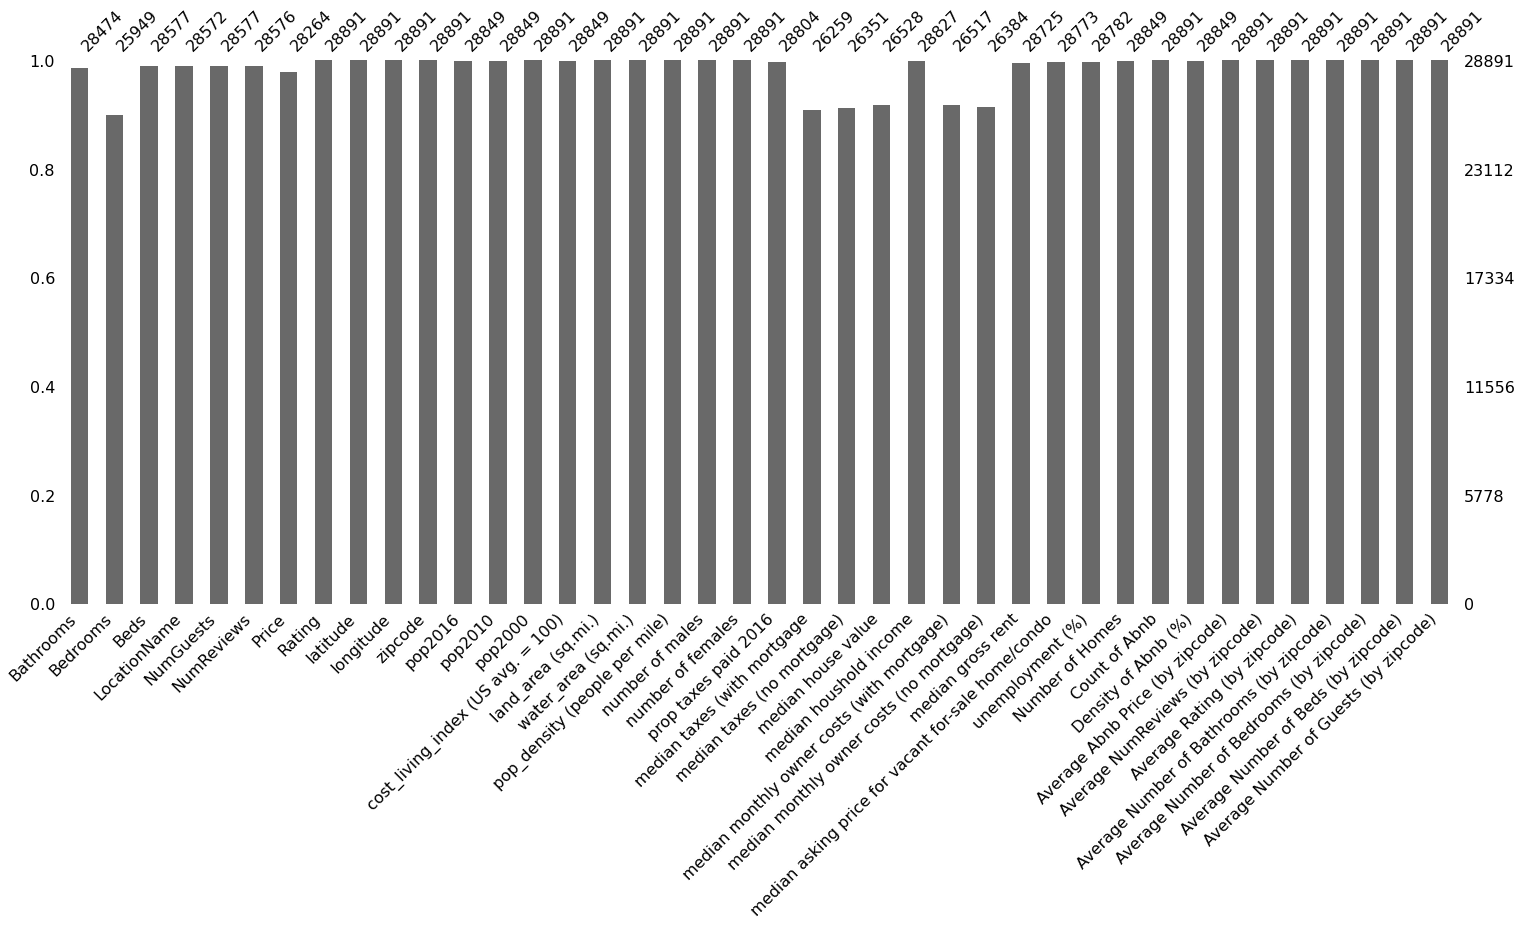

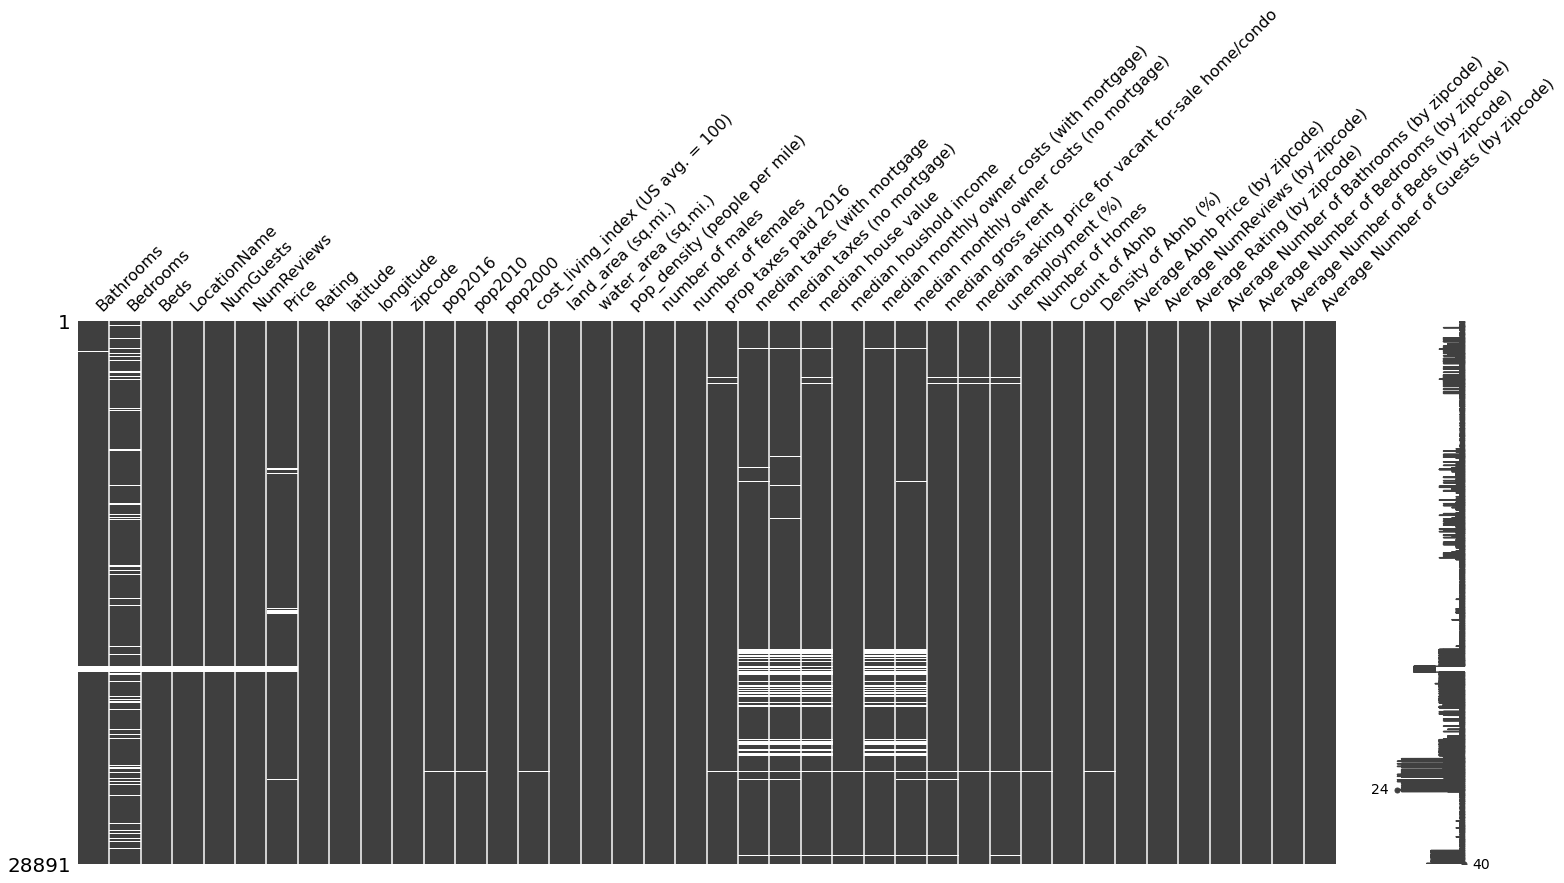

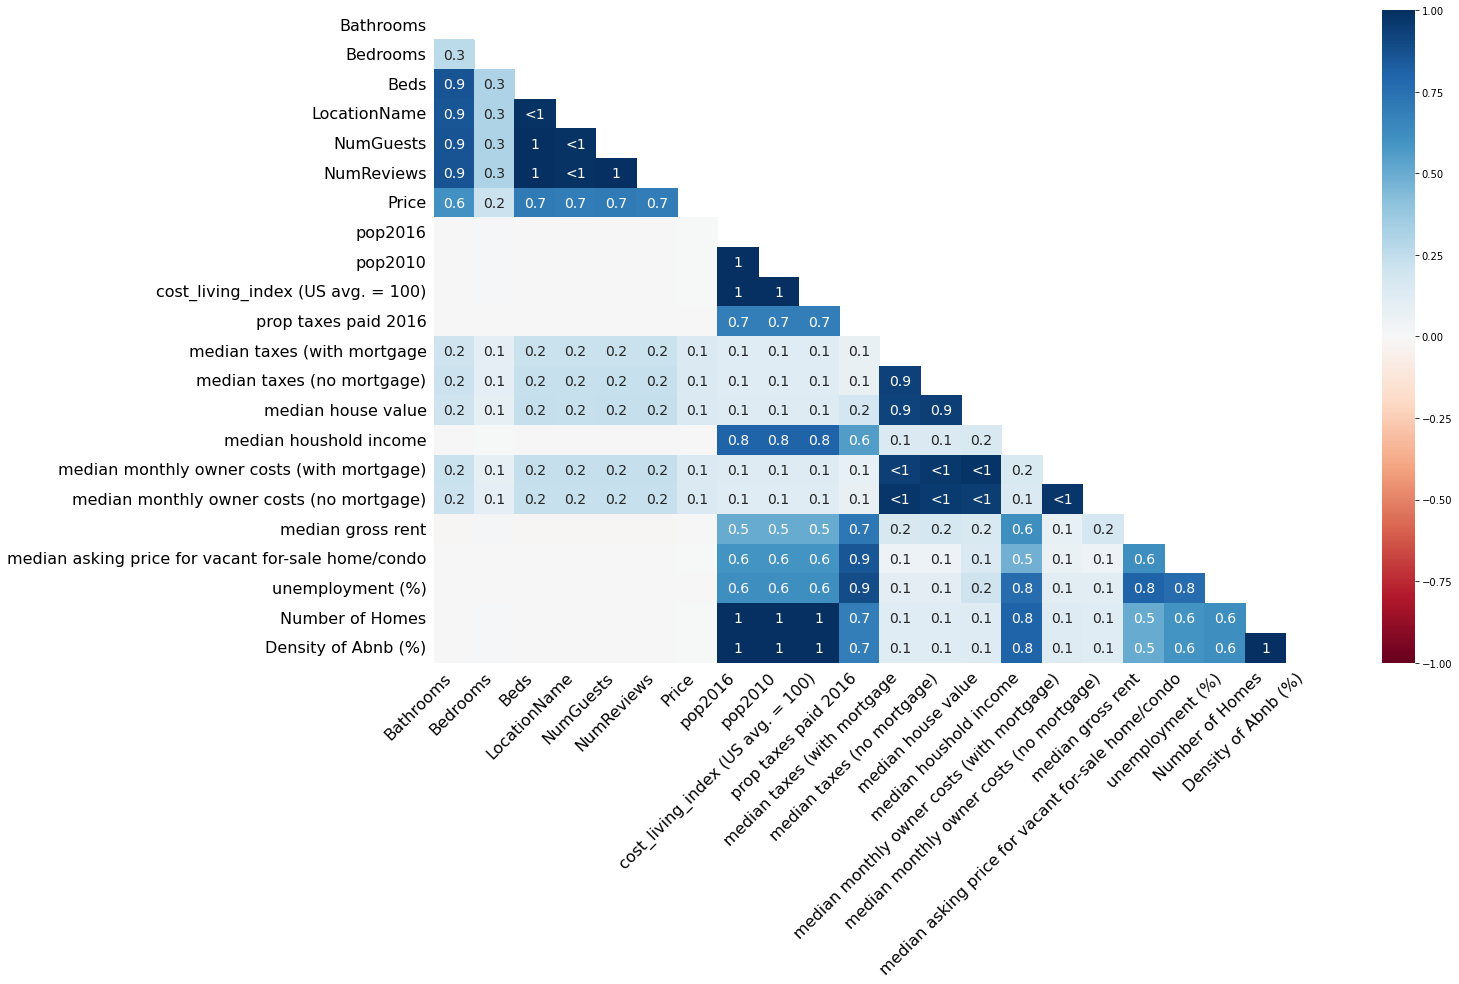

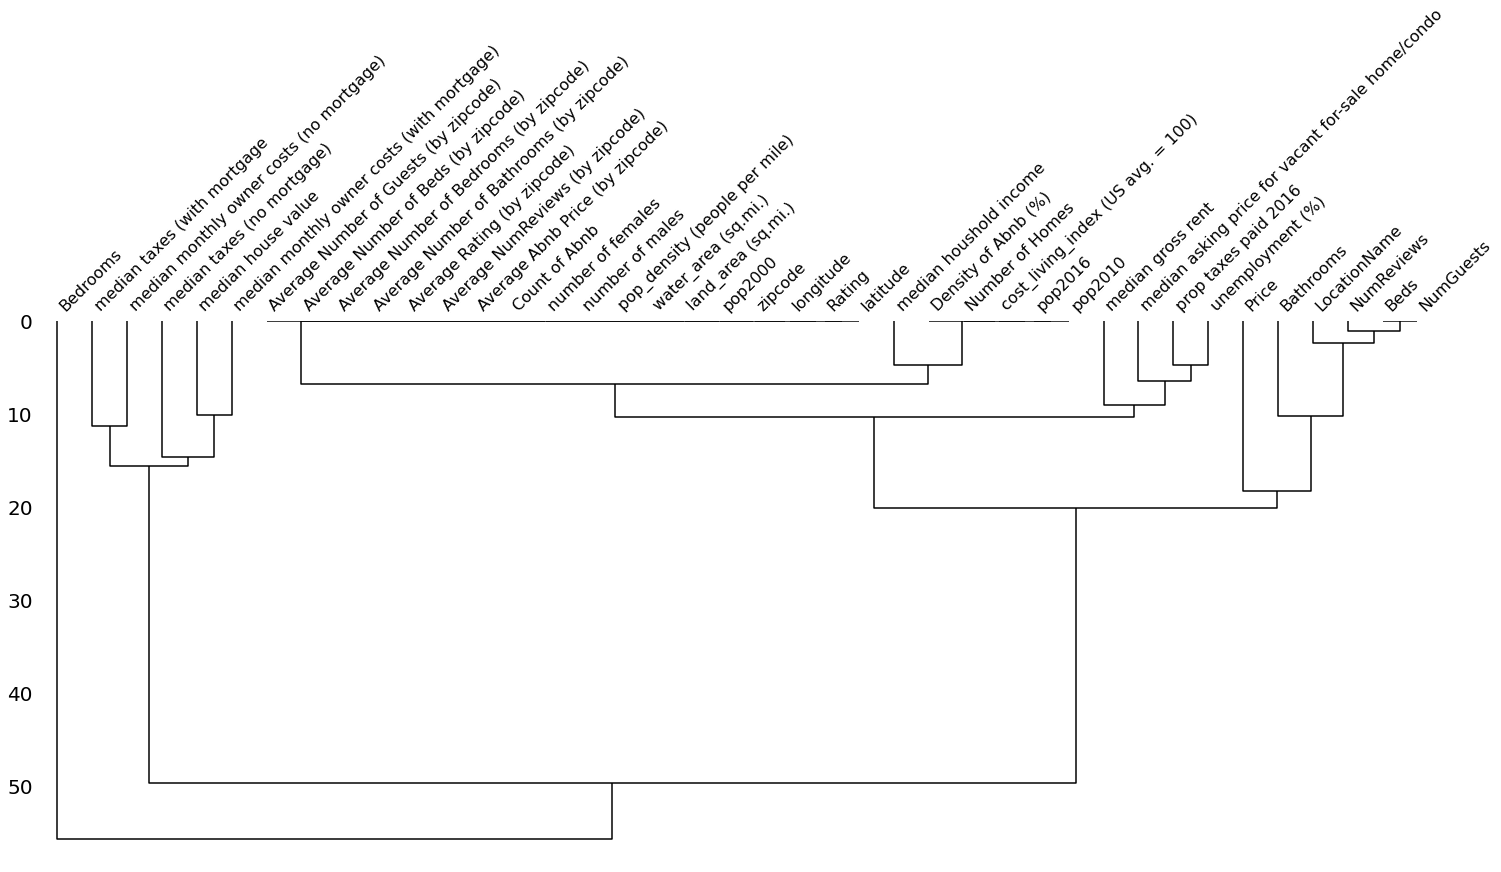

In [47]:
# TODO for Task 3
#bar chart
msno.bar(df)

#visualize missing values as a matrix
msno.matrix(df)

#heapmap for correlation analysis
msno.heatmap(df)

#dendrogram plot
msno.dendrogram(df)


Task 4: What are the potential mechnisms of the missing values? Briefely explain your methodology and your findings (within this markdown cell), and write corresponding code in the next code cell.

(Missing Not at
Random) like **Median taxes with mortgage, Median taxes with (no mortgage), median house value, median monthly owner costs (with mortgage),median monthly owner costs (no mortgage)** . the amount of missing values depend on the column, there are columns with hundreds of values others with thousands 

Bedrooms: missing values completely at random MCAR

Median taxes with mortgage, Median taxes with (no mortgage), median house value, median monthly owner costs (with mortgage),median monthly owner costs (no mortgage): Missing Not at Random (MNAR)

Price: Missing Not at random (MAR)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b0ce85ad0>]],
      dtype=object)

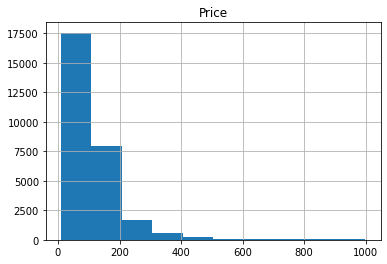

In [48]:
df.hist('Price')

Findings: the data is skewed to the right so the price wasn't missing itself but it depends on other unobserved data. thus MNAR is a good assumption

In [49]:
df.columns[df.isnull().any()]

Index(['Bathrooms', 'Bedrooms', 'Beds', 'LocationName', 'NumGuests',
       'NumReviews', 'Price', 'pop2016', 'pop2010',
       'cost_living_index (US avg. = 100)', 'prop taxes paid 2016',
       'median taxes (with mortgage', 'median taxes (no mortgage)',
       'median house value', 'median houshold income',
       'median monthly owner costs (with mortgage)',
       'median monthly owner costs (no mortgage)', 'median gross rent',
       'median asking price for vacant for-sale home/condo',
       'unemployment (%)', 'Number of Homes', 'Density of Abnb (%)'],
      dtype='object')

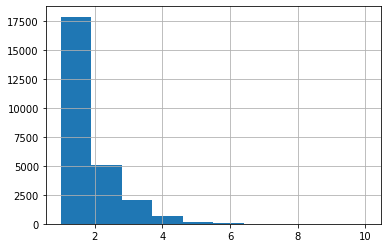

In [50]:
df['Bedrooms'].hist()

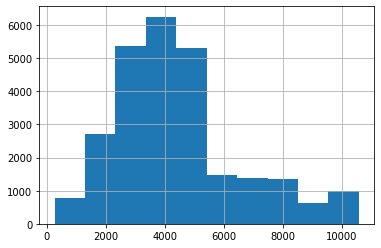

In [51]:
df['median taxes (with mortgage'].hist()

Findings: the data is almost Normal so the price wasn't missing itself but it depends on other observed data (MAR) 

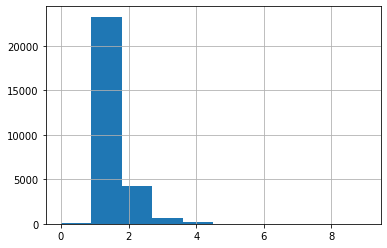

In [52]:
df['Bathrooms'].hist()

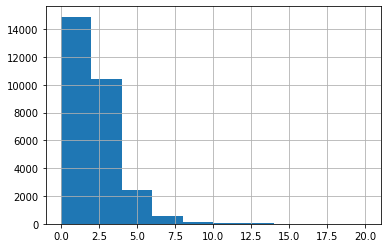

In [53]:
df['Beds'].hist()

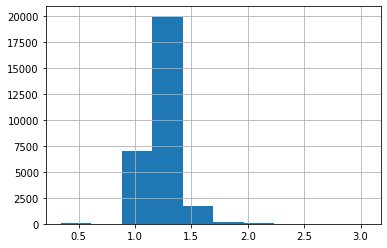

In [54]:
# TODO for Task 4
df['Average Number of Bathrooms (by zipcode)'].hist()

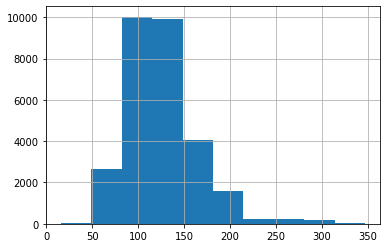

In [55]:
df['Average Abnb Price (by zipcode)'].hist()

In [56]:
missing = df[df.columns[df.isnull().any()]]

we can drop LocationName as zipcode is more representitive and it can do the job of identify location well so there is no need to use LocationName

In [57]:
df.drop('LocationName', axis = 1, inplace = True)

Findings: skewed data most of the times will be of type missing at random as the probability of valiable being missing depends on observed data only

where the normal distribution explain either completely random (MCAR) or missing at random (MAR)

Task 5: Handling missing values, Briefely explain your methodology below (within this markdown cell), and write corresponding code in the next code cell.

In [58]:
missing.isnull().sum()

Bathrooms                                              417
Bedrooms                                              2942
Beds                                                   314
LocationName                                           319
NumGuests                                              314
NumReviews                                             315
Price                                                  627
pop2016                                                 42
pop2010                                                 42
cost_living_index (US avg. = 100)                       42
prop taxes paid 2016                                    87
median taxes (with mortgage                           2632
median taxes (no mortgage)                            2540
median house value                                    2363
median houshold income                                  64
median monthly owner costs (with mortgage)            2374
median monthly owner costs (no mortgage)              25

In [59]:
missing.isnull().sum()

Bathrooms                                              417
Bedrooms                                              2942
Beds                                                   314
LocationName                                           319
NumGuests                                              314
NumReviews                                             315
Price                                                  627
pop2016                                                 42
pop2010                                                 42
cost_living_index (US avg. = 100)                       42
prop taxes paid 2016                                    87
median taxes (with mortgage                           2632
median taxes (no mortgage)                            2540
median house value                                    2363
median houshold income                                  64
median monthly owner costs (with mortgage)            2374
median monthly owner costs (no mortgage)              25

In [87]:
df['Rating'].value_counts()

Y    19378
N     9513
Name: Rating, dtype: int64

In [60]:
df1 = df.copy() 

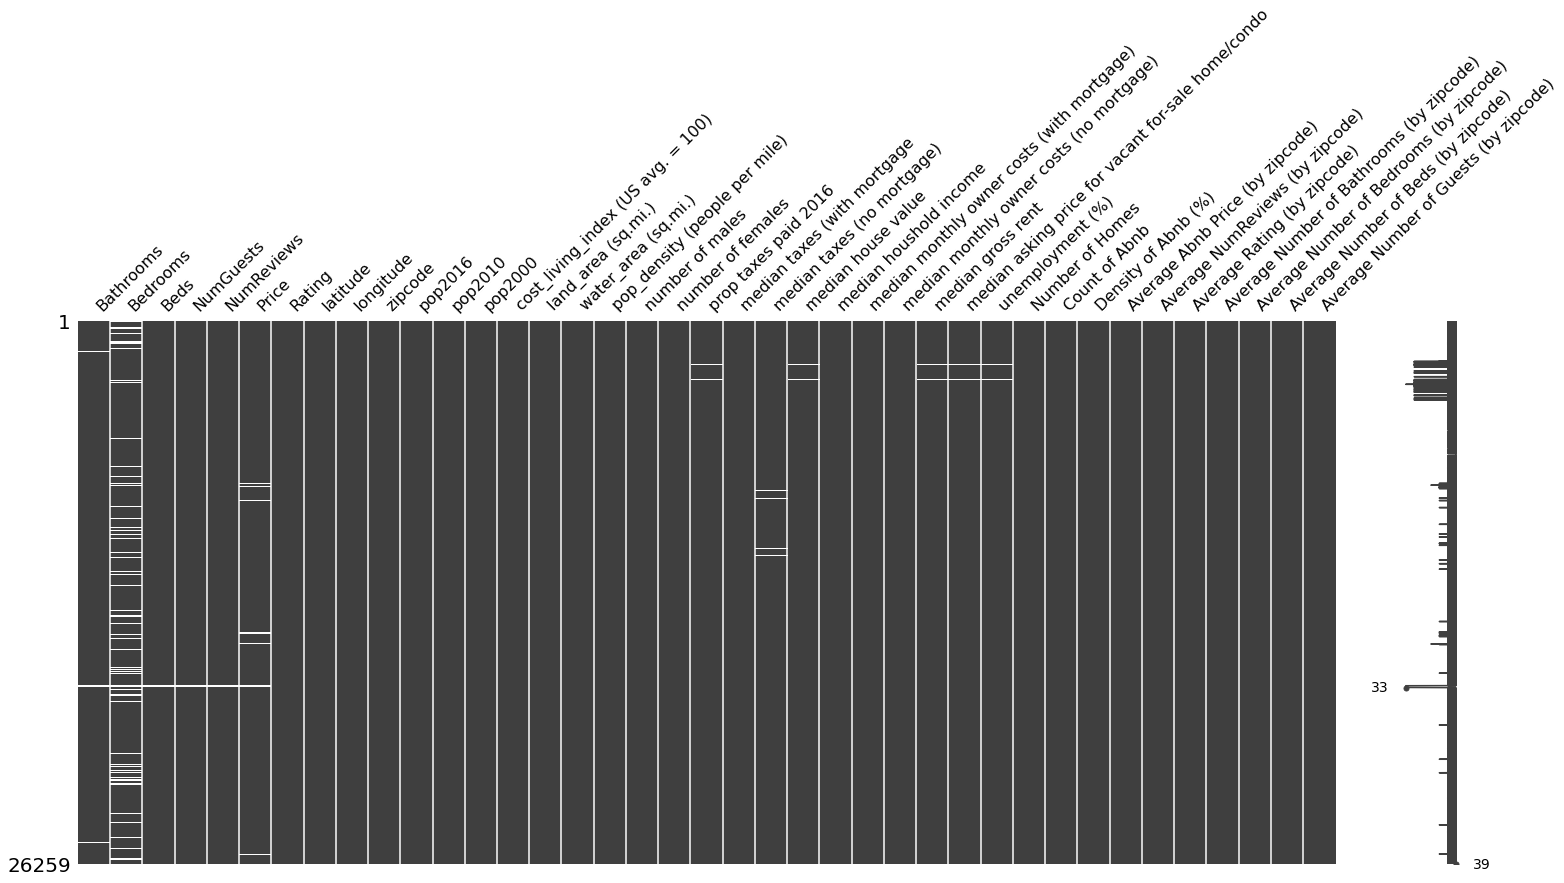

In [61]:
# TODO for Task 5
df1.dropna(subset=['median taxes (with mortgage'], how='any', inplace=True)
msno.matrix(df1)

delete rowwise of Bedrooms and median taxes with mortagage since they have a weak correlation with other missing columns and 

In [62]:
# reset index 
df1.reset_index(inplace = True)

In [63]:
# drop index
df1.drop('index', axis = 1, inplace=True)

In [64]:
#comvert rating into numerical values
y = df1['Rating'].astype('category').cat.codes
y

0        1
1        0
2        1
3        1
4        1
        ..
26254    0
26255    1
26256    1
26257    1
26258    1
Length: 26259, dtype: int8

In [65]:
#drop Rating
df1.drop('Rating', axis = 1, inplace= True)

In [66]:
import seaborn as sns


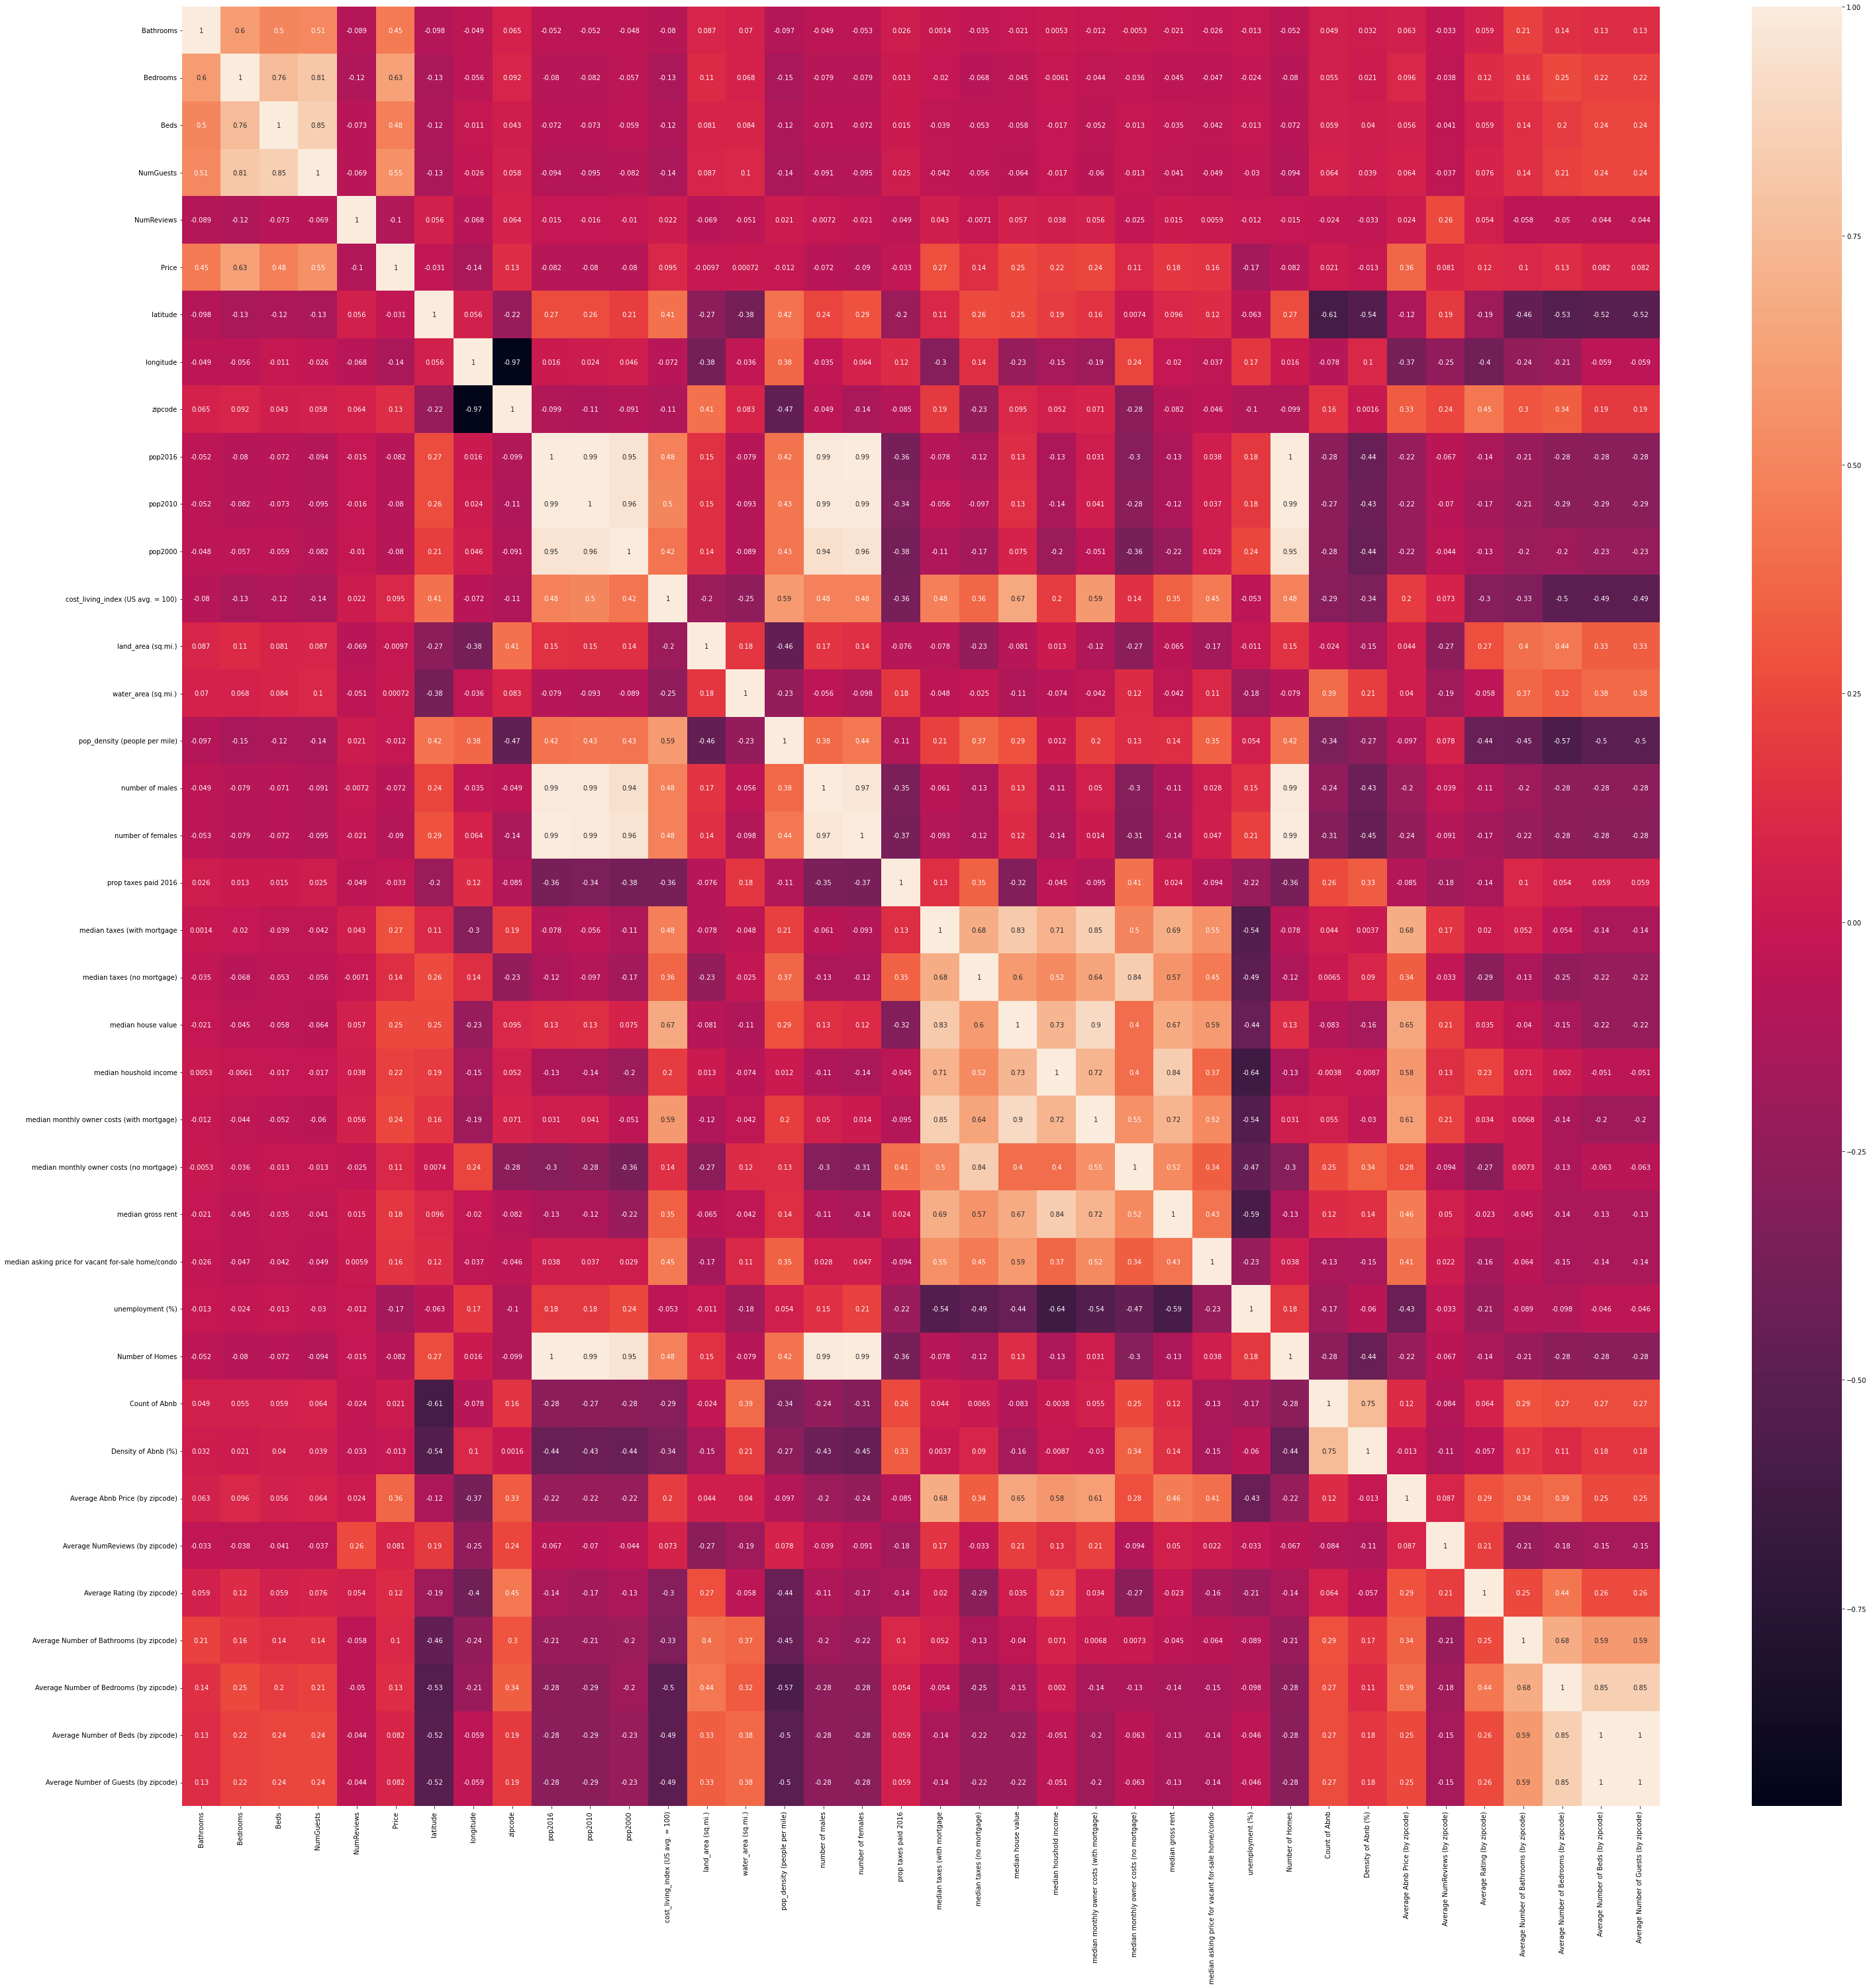

In [67]:
import matplotlib.pyplot as plt
# plot a heatmap
f, ax = plt.subplots(figsize=(50, 50))
ax = sns.heatmap(df1.corr(), annot = True)


In [68]:
from sklearn.impute import SimpleImputer

# Create mean imputer object
mean_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
df1.iloc[:, :] = mean_imputer.fit_transform(df1)

In [69]:
df1.shape, y.shape

((26259, 38), (26259,))

Task 6: Impact on classification performance. Consider one of the above handling method you proposed for this dataset and perform classification tast to investigate if your handling method can improve classificaiton performance. 

Train-test split: you can do one split of train and test where 70% of the data for training and the remaining 30% for testing. 
Classifier: you can pick any two tranditional binary classifier (e.g., from sklearn)

### Trial 1

simpler imputer with mean with XGBoost (why)
[XGBoost](https://www.datacamp.com/community/tutorials/xgboost-in-python)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = .3, random_state=42)

In [71]:
# TODO for Task 6

import xgboost as xgb
#building model 

xg_classifier = xgb.XGBClassifier()
xg_classifier.fit(X_train,y_train)

XGBClassifier()

In [72]:
y_train

13761    0
4446     1
14464    0
10316    1
5364     1
        ..
21575    1
5390     0
860      1
15795    0
23654    1
Length: 18381, dtype: int8

In [73]:
from sklearn.metrics import f1_score
preds = xg_classifier.predict(X_test)
print('F1-score', f1_score(y_test, preds))

F1-score 0.8013087934560327


### Trial 2
simple imputer with median 

In [74]:
df_median = df.copy()

In [75]:
df_median.dropna(subset=['median taxes (with mortgage'], how='any', inplace=True)
df_median.drop('Rating', axis = 1, inplace= True)
# drop index
df_median.reset_index(inplace=True)
df_median.drop('index', axis = 1, inplace=True)

In [76]:
from sklearn.impute import SimpleImputer

# Create mean imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute mean values in the DataFrame diabetes_mean
df_median.iloc[:, :] = median_imputer.fit_transform(df_median)

In [77]:
# split dataset into train-test
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(df_median, y, test_size = .3, random_state=42, stratify = y)

In [78]:
xg_classifier.fit(X_train_median, y_train_median)
preds = xg_classifier.predict(X_test_median)
print('F1-score', f1_score(y_test_median, preds))

XGBClassifier()

F1-score 0.8050882232252771


### Up-Sampling

as there is one class dominate another we need to upsample the data

In [79]:
upsample_df = df.copy()
upsample_df.dropna(subset=['median taxes (with mortgage'], how='any', inplace=True)
upsample_df.drop('Rating', axis = 1, inplace= True)
# drop index
upsample_df.reset_index(inplace=True)
upsample_df.drop('index', axis = 1, inplace=True)

In [80]:
df_median.shape, y.shape

((26259, 38), (26259,))

In [81]:
from sklearn.impute import SimpleImputer

# Create mean imputer object
median_imputer = SimpleImputer(strategy='mean')

# Impute mean values in the DataFrame diabetes_mean
upsample_df.iloc[:, :] = median_imputer.fit_transform(upsample_df)

In [82]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(upsample_df, y)

In [83]:
y_resampled.value_counts()

1    17572
0    17572
dtype: int64

In [84]:
# split dataset into train-test
X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(X_resampled, y_resampled, test_size = .3, random_state=42, stratify = y_resampled)

In [85]:
y_train_resample.value_counts(), y_test_resample.value_counts()

(1    12300
 0    12300
 dtype: int64, 1    5272
 0    5272
 dtype: int64)

In [86]:
# building classifier
xg_classifier.fit(X_train_resample, y_train_resample)
preds = xg_classifier.predict(X_test_resample)
print('F1-score', f1_score(y_test_resample, preds))

XGBClassifier()

F1-score 0.7512735722584682


Task 7: Report your findings through the above experiments (in this markdown cell)


I have used XGBoost as most of the times it is the best algorithm for tabular data, I have tried different imputation starategy and I think mean is doing a good job. I deleted None values for median taxes with mortgage as it is completely random. I tried to up-sample the No because Yes dominates it but this did n't improve the model's score
so after some Trials imputing missing values with mean and using XGBoost give me a good result  